# Exercise Myoelectric Control for Artificial Limbs

In this assignment you will implement an ordinary least squares estimator

$
W = (XX^\top)^{-1}XY^\top
$

for prediction of 2 dimensional hand positions from electromyographic recordings obtained with a high-density electrode array of the lower arm. 

In the data file you will find training data and labels. The data are bandpower time series in 192 dimensions (electrodes). The labels are 2 dimensional hand positions measured with a motion capture system. You will also find test data, for which no labels will be provided. The data loading routine already does the log-transform of the bandpower data, so you can just go ahead and compute the Ordinary Least Squares solution. 

In [1]:
import pylab as pl
import scipy as sp
from scipy.linalg import inv
from scipy.io import loadmat
import matplotlib.pyplot as pl

def load_data(fname):
    # load the data
    data = loadmat(fname)
    # extract images and labels
    X = sp.log(data['training_data'])
    Y = data['training_labels']
    Xtest = sp.log(data['test_data'])
    return X,Y,Xtest

# Which hand movement was performed?

Implement the ordinary least squares estimator above in order to predict the hand position from the myoelectric data. 

Then plot the predictions of the test data. Which hand movement was performed? 

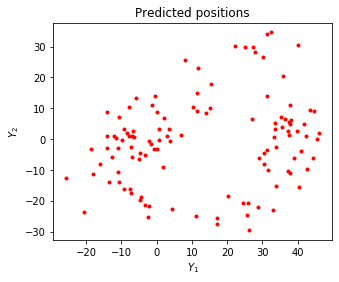

In [2]:
X,Y,Xtest = load_data('assignment/myo_data.mat')

# Compute ordinary least squares solution
# INSERT CODE HERE
W = sp.linalg.inv(X @ X.T) @ X @ Y.T
# predict test data
# print('Xtest: ',Xtest.shape) #:-> Xtest:  (192, 116)
Ytest = W.T.dot(Xtest)
# plot
fig = pl.figure(figsize=(5,4))
fig.clf()
pl.plot(Ytest[0,:],Ytest[1,:],'r.')
pl.xlabel('$Y_1$');
pl.ylabel('$Y_2$');
pl.title('Predicted positions');

# Visualize input data

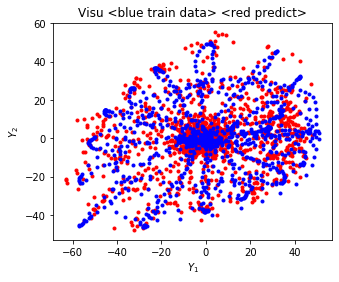

In [3]:
## Visualize X and Y in red and blue!
X,Y,Xtest = load_data('assignment/myo_data.mat')

# show covariance visualize
# pl.imshow(X @ X.T)

# Compute ordinary least squares solution
# INSERT CODE HERE
#print('X: ',X.shape) #:-> X:  (192, 1376)
#print('Y: ',Y.shape) #:-> Y:  (2, 1376)
W = sp.linalg.inv(X @ X.T) @ X @ Y.T
#print('W: ',W.shape) #:-> (192,2)
# predict test data
Y_fit = W.T.dot(X)
#print('Y_fit: ',Y_fit.shape) #:-> Y_fit:  (2, 1376)
# plot
fig = pl.figure(figsize=(5,4))
fig.clf()
# prediction from W on test data
pl.plot(Y_fit[0,:],Y_fit[1,:],'r.')
# trainings data blue
pl.plot(Y[0,:],Y[1,:],'b.')

pl.title('Visu <blue train data> <red predict>');
pl.xlabel('$Y_1$');
pl.ylabel('$Y_2$');

# Show Covariance of input data

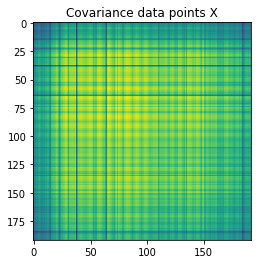

In [4]:
X,Y,Xtest = load_data('assignment/myo_data.mat')
# show covariance visualize
pl.title('Covariance data points X');
pl.imshow(X @ X.T);